
# 3.2 Assignment: Using Data to Improve a Marketing Promotion - R

For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:

- Box plots
- Scatter plots
- Regression Model

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Importing the Data

In [2]:
df <- read.csv("dodgers.csv")
head(df)

month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO


The data in this dataset contains information for 81 Dodgers Games. Since the goal of the project will be to determine which attributes increase attendance, we can assume that this data is from the Dodgers home stadium. 

The attributes are as follows:
- month : Month the game was in (categorical)
- day : day the game was (integer)
- attend : number of attendance (integer)
- day_of_week : Day of the week the game was held (categorical)
- opponent : The opposing team (categorical)
- temp : Atmospheric temperature (F) (integer)
- skies : Weather at the time of the event. Clear/Cloudy (categorical)
- day_night : Time of day the game was (day/night) (categorical)
- cap : If hats were sold at the game (Yes/No) (categorical)
- shirt : If shirts were sold at the game (Yes/No) (categorical)
- fireworks : If fireworks were used at the game (Yes/No) (categorical)
- bobblehead : If bobbleheads were sold at the game (Yes/No) (categorical)

# Exploratory Data Analysis

First, we can check the breakdown of how many games we can expect throughout the baseball season and how they are distributed between each month

In [3]:
df$month <- factor(df$month,
    levels = c('APR','MAY','JUN','JUL','AUG','SEP','OCT'),ordered = TRUE)

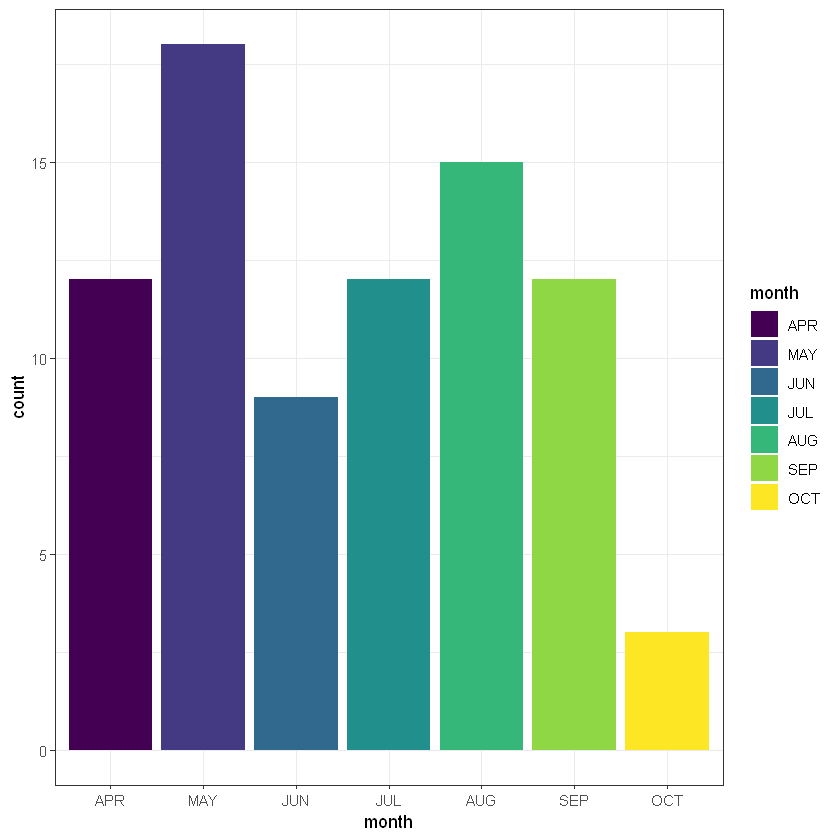

In [4]:
ggplot(data = df, aes(x = month)) + 
geom_bar(aes(fill = month)) + 
theme_bw()

We can check the attendance of each month visually by using a boxplot

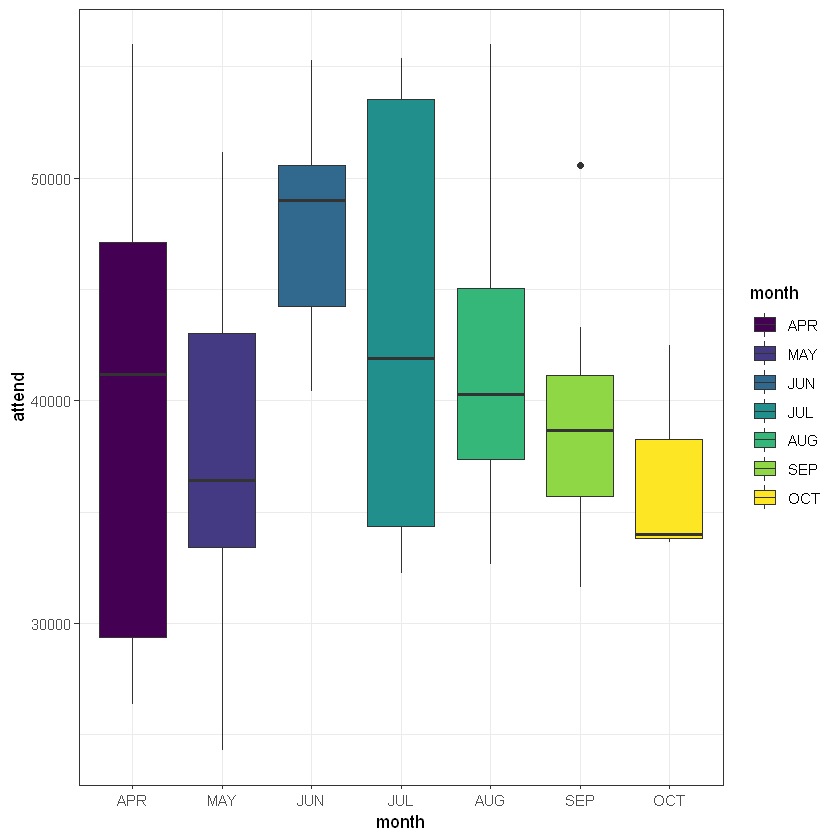

In [5]:
ggplot(data = df, aes(x = month, y = attend)) + 
geom_boxplot(aes(fill = month)) + 
theme_bw()

From this graph, we can see that June has the highest attendance with the lowest variance.

We can perform similar statistics on the day of the week our games were on.

In [6]:
df$day_of_week <- factor(df$day_of_week,
    levels = c('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),ordered = TRUE)

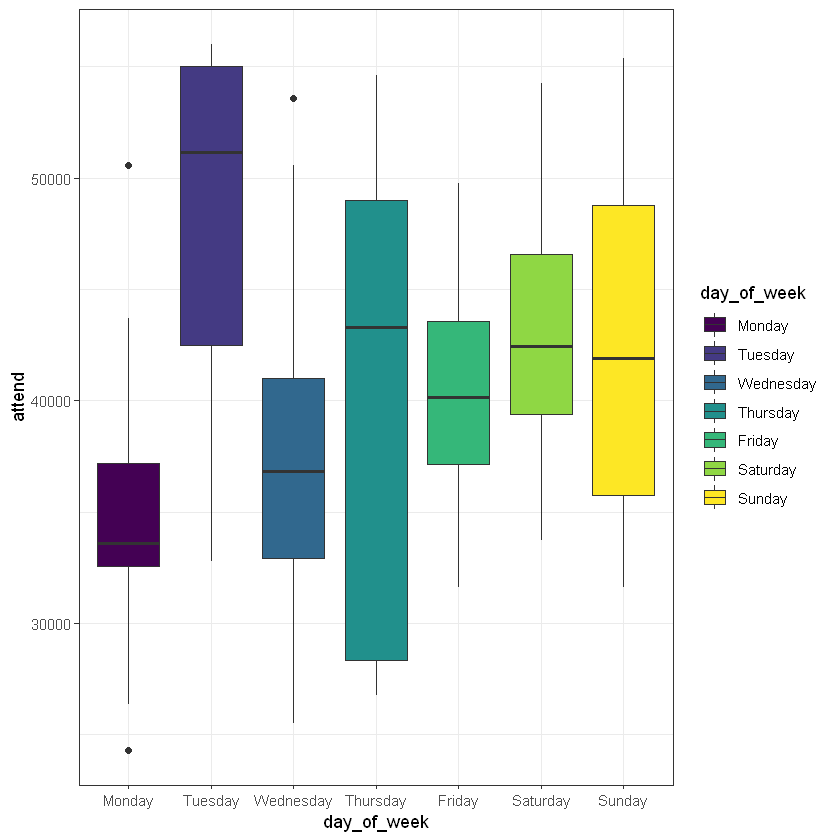

In [7]:
ggplot(data = df, aes(x = day_of_week, y = attend)) + 
geom_boxplot(aes(fill = day_of_week)) + 
theme_bw()

Tuesdays seem to be the most popular day of the week to catch a game. 
We can also check to see if weather impacts our attendance

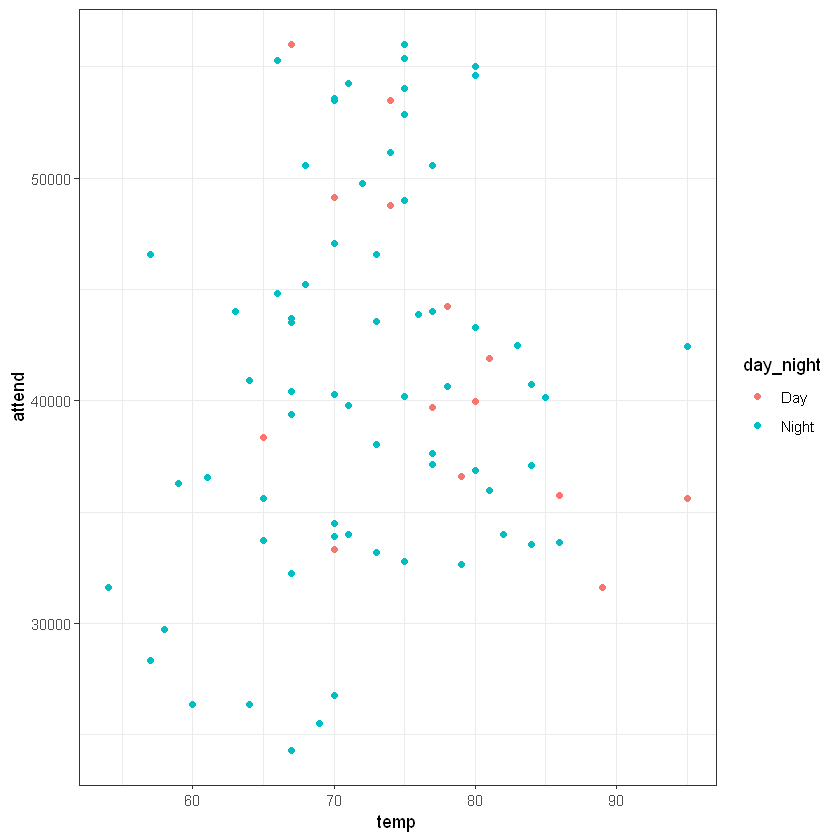

In [8]:
ggplot(data = df, aes(x = temp, y = attend)) + 
geom_point(aes(color = day_night)) + 
theme_bw()

There is a very low correaltion between temperature and attenance, so it isn't very likely that it impacts attenance

This can also been seen by checking whether or not the skies were clear or cloudy

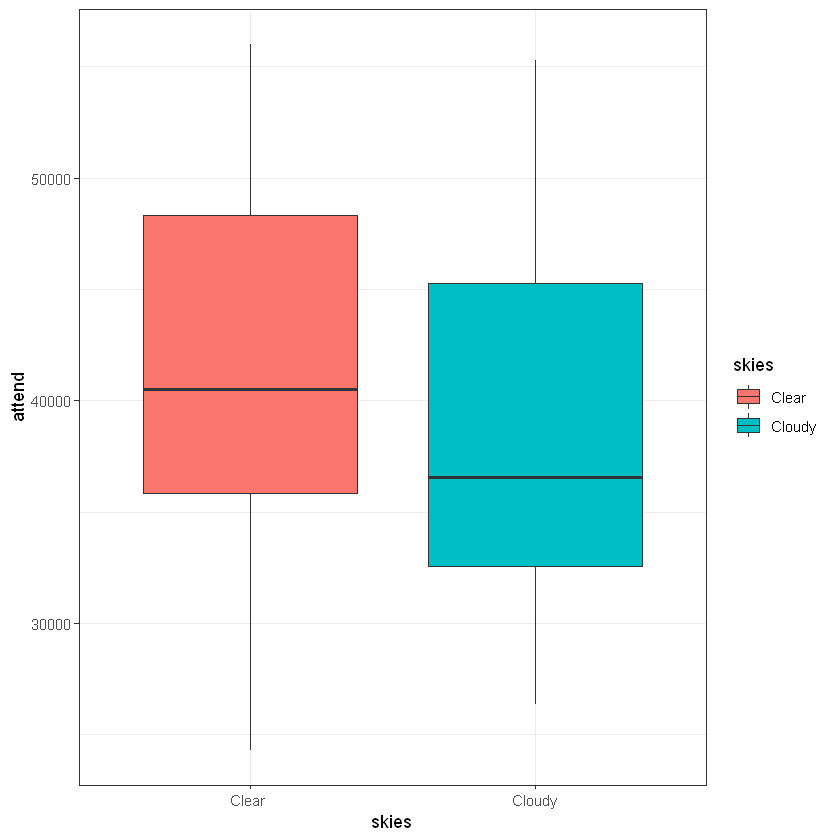

In [9]:
ggplot(data = df, aes(x = skies, y = attend)) + 
geom_boxplot(aes(fill = skies)) + 
theme_bw()

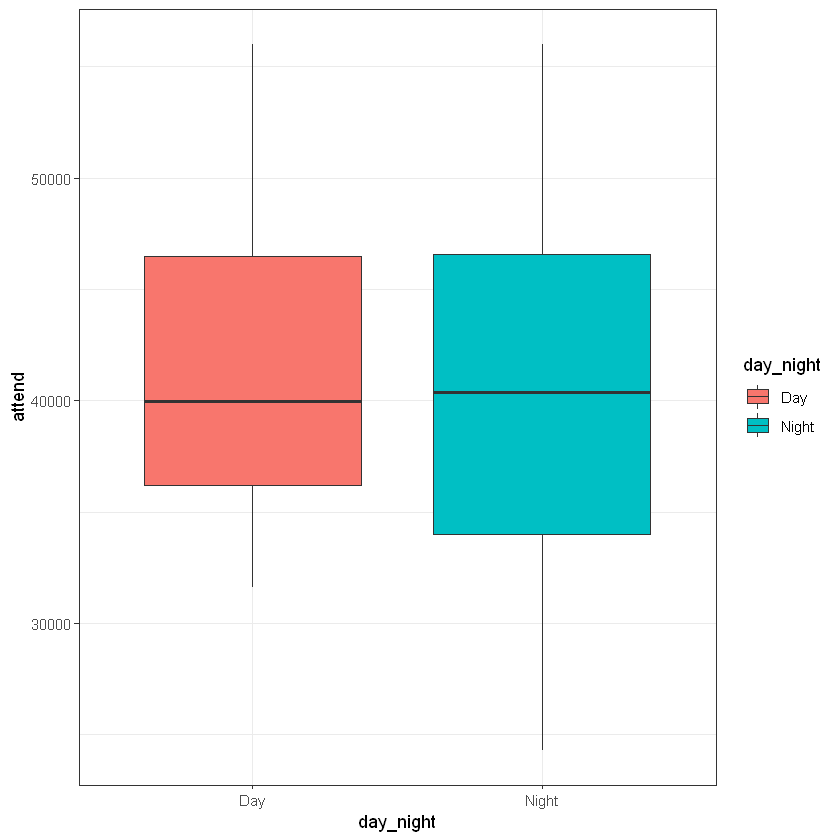

In [10]:
ggplot(data = df, aes(x = day_night, y = attend)) + 
geom_boxplot(aes(fill = day_night)) + 
theme_bw()

Now that we've established some of the issues out of our control, we can analyze some of the attributes we can alter. By selling different products at different games, we can see which is more likely to increase attenance.

Hats don't really seem like the best item to sell at these games to increase attendance. Average attenance actually was lower when caps weren't sold.

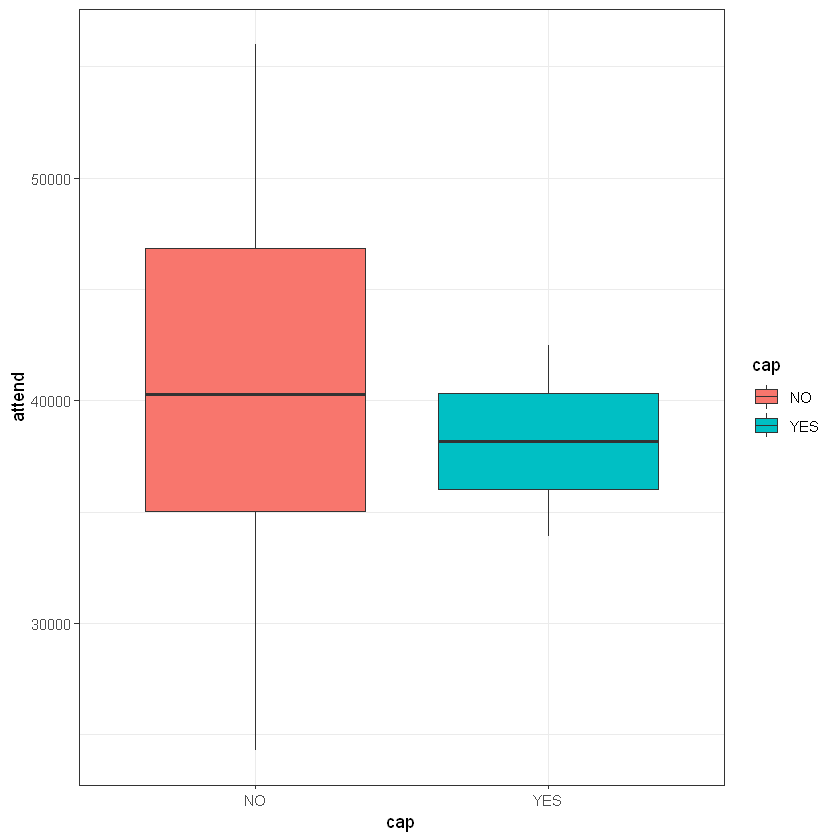

In [11]:
ggplot(data = df, aes(x = cap, y = attend)) + 
geom_boxplot(aes(fill = cap)) + 
theme_bw()

Fireworks don't really seem to have that much of an impact on attenance. Fireworks are primarily used on Fridays as well. 

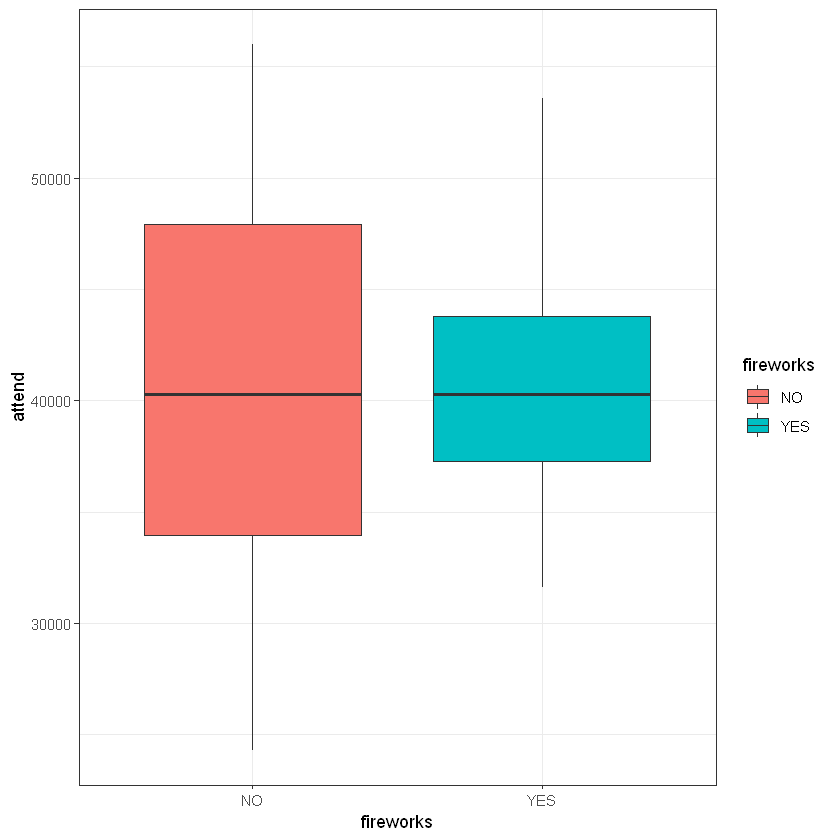

In [12]:
ggplot(data = df, aes(x = fireworks, y = attend)) + 
geom_boxplot(aes(fill = fireworks)) + 
theme_bw()

Shirts on the other hand do have an impact on attenance. When shirts were sold, attenance was significantly higher. We can see this visually from our boxplot.

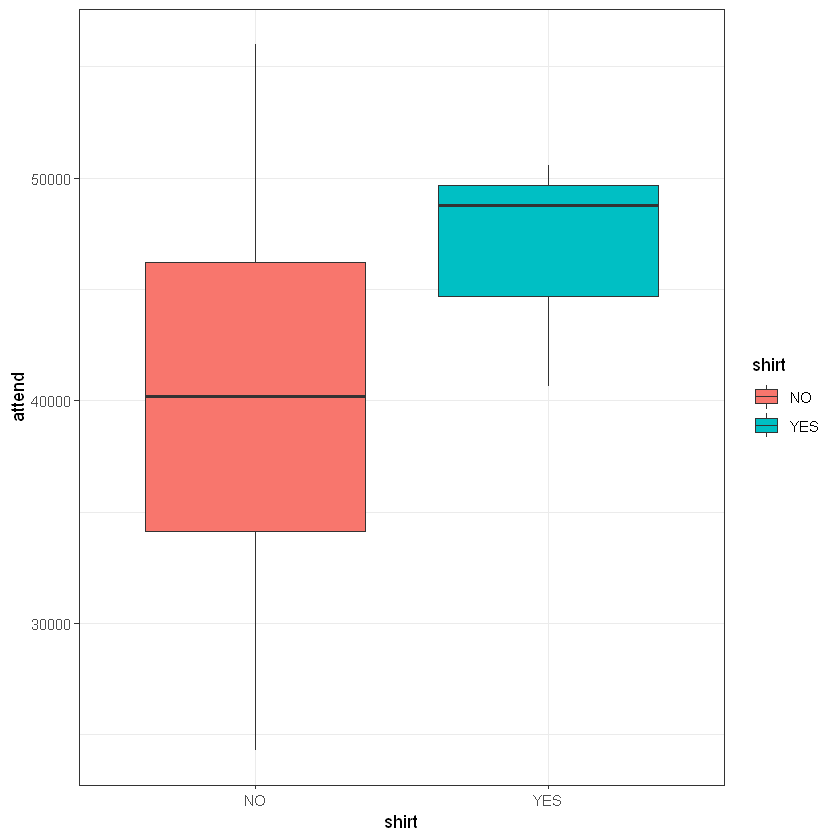

In [13]:
ggplot(data = df, aes(x = shirt, y = attend)) + 
geom_boxplot(aes(fill = shirt)) + 
theme_bw()

Lastly, we can see the impact that selling bobbleheads at the games. From the data we have, we can see a large increase in attenance when bobbleheads are sold. 

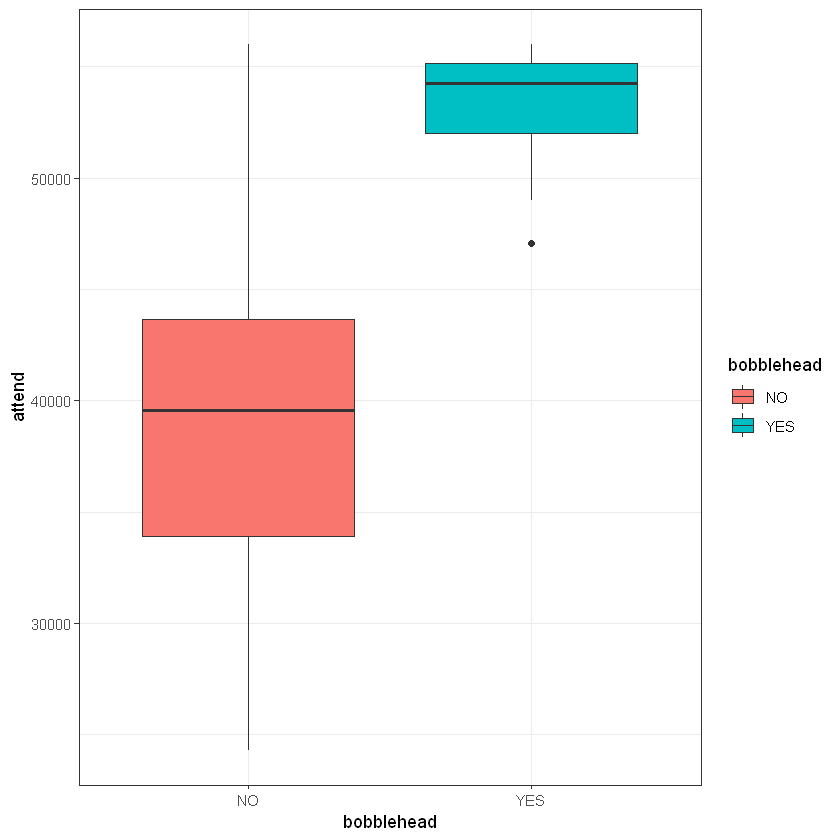

In [14]:
ggplot(data = df, aes(x = bobblehead, y = attend)) + 
geom_boxplot(aes(fill = bobblehead)) + 
theme_bw()

# Creating a Regression Model

We can now make a linear regression model to determine which attributes impact our attenance and in what way

In [15]:
model.df <- data.frame()
model <- lm(attend ~ shirt + cap + fireworks + bobblehead , data = df)
summary(model)


Call:
lm(formula = attend ~ shirt + cap + fireworks + bobblehead, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13889.1  -4466.1   -185.1   3729.1  17798.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   38201.08     933.09  40.940  < 2e-16 ***
shirtYES       8442.59    3958.77   2.133   0.0362 *  
capYES          -11.58    4803.39  -0.002   0.9981    
fireworksYES   2876.78    2010.56   1.431   0.1566    
bobbleheadYES 14943.56    2215.26   6.746 2.64e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6664 on 76 degrees of freedom
Multiple R-squared:  0.3873,	Adjusted R-squared:  0.3551 
F-statistic: 12.01 on 4 and 76 DF,  p-value: 1.293e-07


From our linear regression model, we can see that quite a few attributes have a high impact on our attenance. Our attribute with the highest coefficient and significant p-value is our bobblehead attribute. Bobblehead sales seem to be effective in increasing the attendance at our games. We can 14943 more people to come to our games on avearge when bobbleheads are sold. Our second highest coefficient with a significant p-value is shirt sales. Shirts tend to bring in 8442 more attendents on average. Our other attributes aren't significant enough to worry about. 

In conclusion, the best goods to sell at our games are shirts and bobbleheads.